<a href="https://colab.research.google.com/github/olufam/Msc-Dissertation/blob/main/image_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌍 Python Image Search Script 🔎

I designed this script to help with the aid of search bulk free images online for education use only. It is helps to simplify the process of searching and extracting images from the web based on specific keywords and criteria. Whether you need images for web development, research, or any other purpose, this script streamlines the image gathering process.

## Key Functionalities

- **Keyword-Based Search**: Users can set keywords as search criteria, enabling the script to fetch images that match these keywords from the web.

## ❗❗❗  Important Notice

**Respect Copyright Laws**: Before using this script, it's crucial to understand and respect copyright laws. Unauthorized use of copyrighted images is not allowed. Ensure that the images you collect and use are either in the public domain, licensed under Creative Commons, or obtained with proper permissions.

## ✅ How to Use the Python Image Search Script

Using the Python Image Search Script is easy:

1. **Install Required Libraries**: Ensure you have the necessary Python libraries, such as OpenCV and TensorFlow, installed on your system.

2. **Customize Search Criteria**: Set the keywords in the script to define your search criteria, whether it's content-based, keyword-based, or a combination of both.

3. **Run the Script**: Execute the script, providing the search parameters as input.

4. **Download Zip File for Review**: The script will output a zip file based on the defined keywords, containing all search information. Download and review the images to suit your purpose.

## ❗❗❗ Use for Educational Purpose Only




In [7]:
# Install neccessary Libries
%pip install opencv-python
%pip install simple_image_download
%pip install pyexiv2

In [8]:
# Import necessary libraries
from simple_image_download import simple_image_download as simp
import zipfile
import os
import shutil
import glob
import cv2
from google.colab.patches import cv2_imshow  # For Google Colab

# Initialize the simple_image_download object for downloading images
response = simp.simple_image_download


# Set the number of Images to be Extracted [e.g 200, 400, 600 etc]
# Note: The Higher the Extracted Value, the longer the process
extracted_value = 20


# Define the list of keywords for which to download images
keywords = ["free image health worker working", "free image PPE kits", "free image construction workers working"]
keywords += ["free image lab workers working", "free image Safety kits"]

Displaying images for keyword: free image health worker working


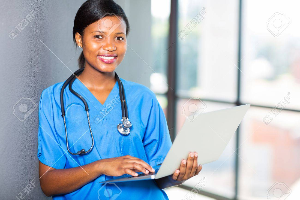

Displaying images for keyword: free image PPE kits


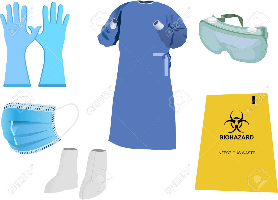

Displaying images for keyword: free image construction workers working


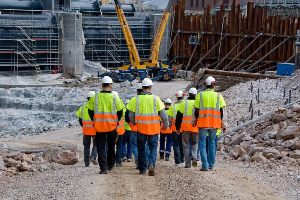

Displaying images for keyword: free image lab workers working


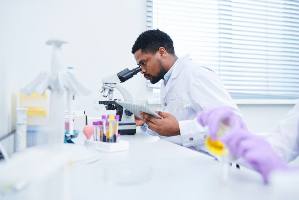

Displaying images for keyword: free image Safety kits


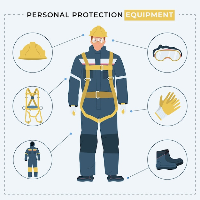

In [9]:
# Setup download directory
HOME = os.getcwd()
dwnld_path = os.path.join(HOME, 'simple_images')

if os.path.exists(dwnld_path):
    shutil.rmtree(dwnld_path)

download_directory = dwnld_path

# Function to remove images based on file size before zipping
def remove_images_by_size(keyword):
    image_files = glob.glob(f"{download_directory}/{keyword}/*.*")

    for image_file in image_files:
        file_size = os.path.getsize(image_file) / 1024  # Convert bytes to KB
        if not (20 <= file_size <= 800):
            os.remove(image_file)

# Function to display just one image for each keyword
def display_images(keyword):
    image_files = glob.glob(f"{download_directory}/{keyword}/*.*")
    image_files.sort(reverse=True)

    for image_file in image_files:
        if os.path.exists(image_file):
            img = cv2.imread(image_file)

            if img is not None and (img.shape[0] > 100 or img.shape[1] > 100):
                # Calculate new dimensions for display
                new_height = 200
                aspect_ratio = img.shape[1] / img.shape[0]
                new_width = int(new_height * aspect_ratio)

                # Resize just for display
                display_img = cv2.resize(img, (new_width, new_height))

                # Display the resized image
                cv2_imshow(display_img)  # For Google Colab
                cv2.waitKey(0)
                cv2.destroyAllWindows()
                break  # Stop after displaying one image

# Function to zip the downloaded images
def zip_files(directory_path, zip_path):
    with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, _, files in os.walk(directory_path):
            for file in files:
                full_path = os.path.join(root, file)
                zipf.write(full_path, os.path.relpath(full_path, directory_path))


# Main loop to download and display images
for kw in keywords:
    response().download(kw, extracted_value)
    print(f"Displaying images for keyword: {kw}")
    display_images(kw)
    remove_images_by_size(kw)

# Zip the downloaded images
zip_files(download_directory, 'image_gen.zip')


**Image Download and Organization**

After running the script, the images will be downloaded and neatly organized in a zip file named "image_gen.zip." To ensure that you have only the most relevant images for your task, it is recommended to:

1. **Extract**: Unzip the **"image_gen.zip"** file to access the downloaded images.

2. **Review**: Carefully review the downloaded images to identify those that best suit your needs.

3. **Delete Unwanted Images**: Remove any images that are not relevant to your task or do not meet your requirements.

This process allows you to maintain an organized collection of images that are specifically tailored to your project, ensuring efficiency and relevance.
